# CNN. Сверточные нейросети. CIFAR-10. Практика.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

import requests 
from PIL import Image
from io import BytesIO

Import Data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Preprocessing

In [3]:
X_train = X_train.astype('float32') #переводим в вещественные числа
X_test = X_test.astype('float32') 

In [4]:
X_train /= 255
X_test /= 255

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
from keras.utils import np_utils

In [7]:

np_utils.to_categorical(y_train, 10) #теперь классы ортоганальны друг другу
np_utils.to_categorical(y_test, 10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [8]:
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

Model

In [9]:
from keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

Model training

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 87s 220ms/step - loss: 1.4587 - accuracy: 0.4697 - val_loss: 1.1078 - val_accuracy: 0.6036
Epoch 2/10
391/391 [==============================] - 86s 220ms/step - loss: 1.0013 - accuracy: 0.6476 - val_loss: 0.8976 - val_accuracy: 0.6855
Epoch 3/10
391/391 [==============================] - 87s 222ms/step - loss: 0.7849 - accuracy: 0.7216 - val_loss: 0.8012 - val_accuracy: 0.7207
Epoch 4/10
391/391 [==============================] - 88s 225ms/step - loss: 0.6088 - accuracy: 0.7889 - val_loss: 0.7674 - val_accuracy: 0.7365
Epoch 5/10
391/391 [==============================] - 88s 224ms/step - loss: 0.4584 - accuracy: 0.8404 - val_loss: 0.8037 - val_accuracy: 0.7332
Epoch 6/10
391/391 [==============================] - 88s 225ms/step - loss: 0.3257 - accuracy: 0.8861 - val_loss: 0.8898 - val_accuracy: 0.7392
Epoch 7/10
391/391 [==============================] - 90s 231ms/step - loss: 0.2161 - accuracy: 0.9242 - val_loss: 0.9818 - val_ac

Model evaluation

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.3668 - accuracy: 0.7274


[1.366801142692566, 0.727400004863739]

Model prediction

In [23]:
# используем кастомную функцию для перевода изображений в нужный размер

def resize_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    width, height = img.size
    square_side = min(width, height)
    
    img = img.crop((np.ceil((width - square_side)/2),
                    np.ceil((height - square_side)/2),
                    np.ceil((width + square_side)/2),
                    np.ceil((height + square_side)/2)))
    img.thumbnail((32, 32))
    np_array = np.array(img)/255
    
    return np_array

In [24]:
CIFAR10_classes = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'
]

def class_name(ix):
  return CIFAR10_classes[np.array(ix).flatten()[0]]

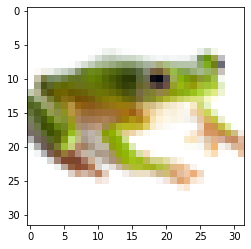

In [33]:
plt.imshow(resize_image('https://assets.petco.com/petco/image/upload/f_auto,q_auto/green-tree-frog-care-sheet-hero'))

In [34]:
class_name(np.argmax(model.predict(np.array([resize_image('https://assets.petco.com/petco/image/upload/f_auto,q_auto/green-tree-frog-care-sheet-hero')]))))

1/1 [==============================] - 0s 31ms/step


'frog'